# Visual Analytics Project

## Importing relevant libraries and loading the dataset

Import libraries

In [10]:
import re # regex for data wrangling
import pandas as pd# for loading data
import numpy as np
import mysql.connector as con
from pandas.tools.plotting import scatter_matrix

In [11]:
%matplotlib inline

Create a connection to the mysql server

In [15]:
connection = con.connect(user = 'root', password = 'root', database = 'foodb')

Read data from the tables

In [13]:
contents = pd.read_sql("SELECT * FROM contents", connection)

KeyboardInterrupt: 

In [16]:
compounds = pd.read_sql("SELECT * FROM compounds", connection)

In [15]:
foods = pd.read_sql("SELECT * FROM foods", connection)

## Data wrangling

Extract number from melting and boiling point columns

In [17]:
compounds['melting_point'] = compounds['melting_point'].str.extract("(-?[0-9]+)", expand = True)

In [18]:
compounds['boiling_point'] = compounds['boiling_point'].str.extract("(-?[0-9]+)", expand = True)

Extract hydrogen, carbon, nitrogen, and oxygen composition

In [19]:
compounds['percent_comp_h'] = compounds['percent_composition'].str.extract("H ([0-9]+\.?[0-9]?[0-9]?)", expand = True)

In [20]:
compounds['percent_comp_c'] = compounds['percent_composition'].str.extract("C ([0-9]+\.?[0-9]?[0-9]?)", expand = True)

In [21]:
compounds['percent_comp_n'] = compounds['percent_composition'].str.extract("N ([0-9]+\.?[0-9]?[0-9]?)", expand = True)

In [22]:
compounds['percent_comp_o'] = compounds['percent_composition'].str.extract("O ([0-9]+\.?[0-9]?[0-9]?)", expand = True)

### Converting strings to numerbs and leaving out rows with NaN values

In this table these numeric attributes have string type, therefore we have toconvert them to numbers using the *to_numeric* function of Pandas. We also leave out the NaN values because the results will be more precise this way. 

In [23]:
numeric_columns = ['moldb_alogps_logp','moldb_alogps_logs', 'moldb_average_mass', 'moldb_pka', 'moldb_logp']
for col in numeric_columns:
    compounds[[col]] = compounds[[col]].apply(pd.to_numeric)
for col in numeric_columns:
    compounds = compounds[np.isfinite(compounds[col])]


### Describe the attributes independently from one another

Now that we have prepared the data, we can describe the different attributes individually using the the describe function of pandas.

In [24]:
compounds[numeric_columns].describe()

moldb_alogps_logp  moldb_alogps_logs  moldb_average_mass     moldb_pka  \
count       12321.000000       12321.000000        12321.000000  12321.000000   
mean            2.021523          -3.308292          520.104277     10.858444   
std             2.902732           1.788148          298.510897      4.492252   
min            -4.750000          -8.160000           60.008900     -4.088090   
25%            -0.110000          -4.520000          312.444300      8.477500   
50%             1.720000          -3.210000          444.388200     11.928114   
75%             3.810000          -2.080000          660.746900     13.809616   
max            11.120000           1.180000         3459.794900     19.993214   

         moldb_logp  
count  12321.000000  
mean       1.839916  
std        4.395317  
min      -23.290000  
25%       -0.900000  
50%        1.585276  
75%        4.175782  
max       27.270000

## Finding some correlations

We will look for correlations between the columns

In [25]:
numeric_columns = ['moldb_alogps_logp','moldb_alogps_logs', 'moldb_average_mass', 'moldb_pka', 'moldb_logp', 'melting_point', 'boiling_point']

In [26]:
for col in numeric_columns:
    compounds[[col]] = compounds[[col]].apply(pd.to_numeric)

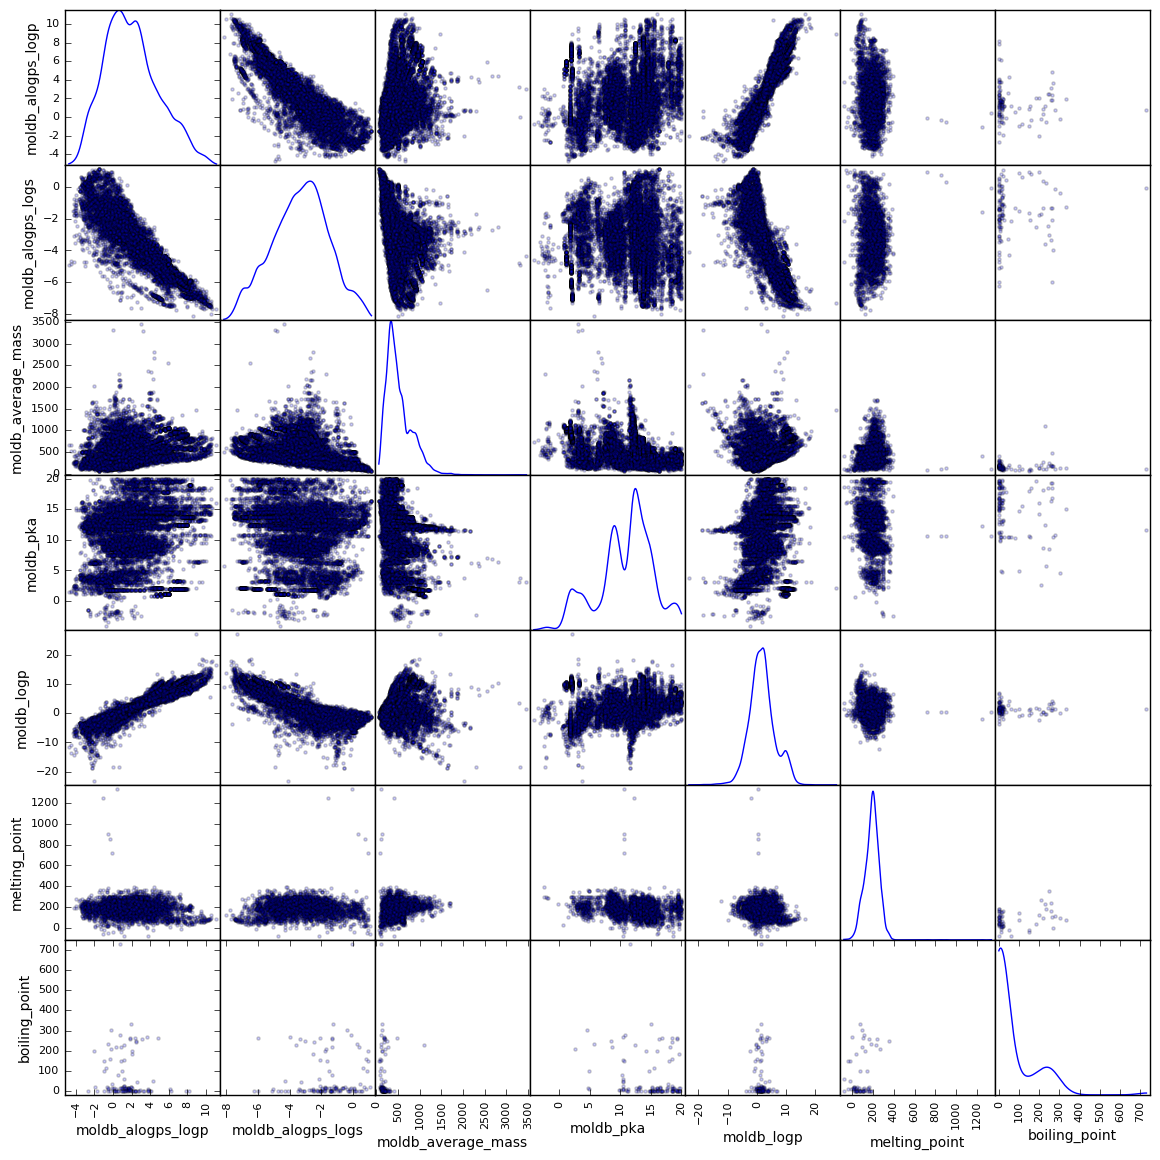

In [27]:
out = scatter_matrix(compounds[numeric_columns], alpha=0.2, figsize=(14, 14), diagonal='kde')

In [6]:
compounds[numeric_columns].corr()

NameError: name 'compounds' is not defined

As we see the melting-point and the boiling point correlate. This is understandable, because if the melting point of a compound is high, its boiling point also has to be high. And most materials have a small temperature intervall where it is liquid.

Look for correlations between the different atoms

In [32]:
composition_columns = ['percent_comp_h', 'percent_comp_o', 'percent_comp_n', 'percent_comp_c']

In [155]:
for col in composition_columns:
    compounds[[col]] = compounds[[col]].apply(pd.to_numeric)

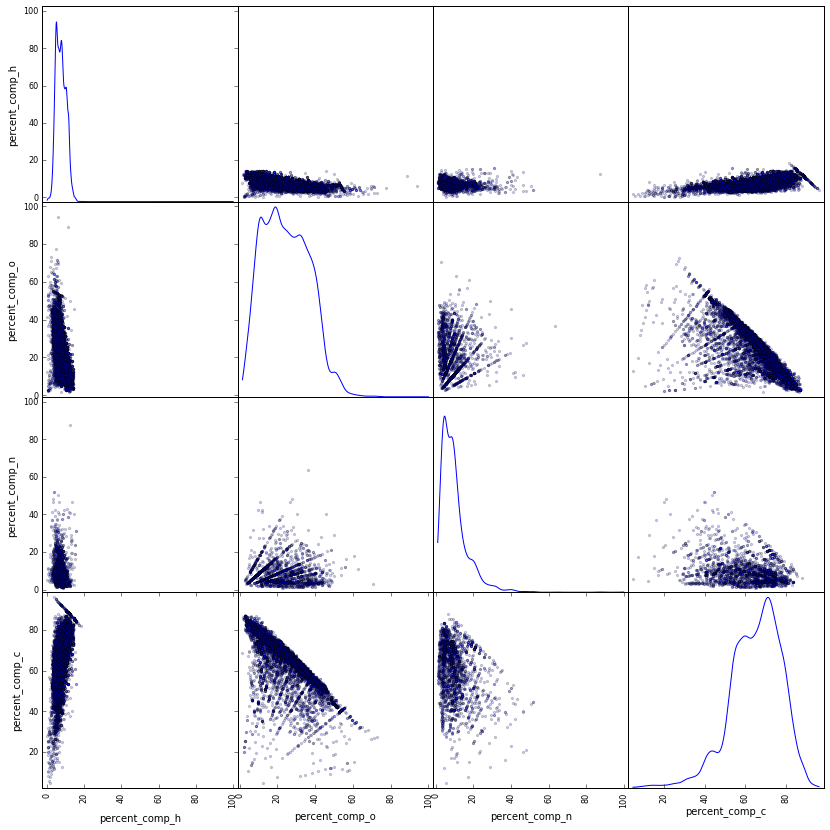

In [157]:
out = scatter_matrix(compounds[composition_columns], alpha=0.2, figsize=(14, 14), diagonal='kde')

In [9]:
compounds[composition_columns].corr()

NameError: name 'compounds' is not defined

As we see, the oxigen and carbon dioxide have an inverse correlation.

Create a huge matrix, trying to find any meaningful correlation

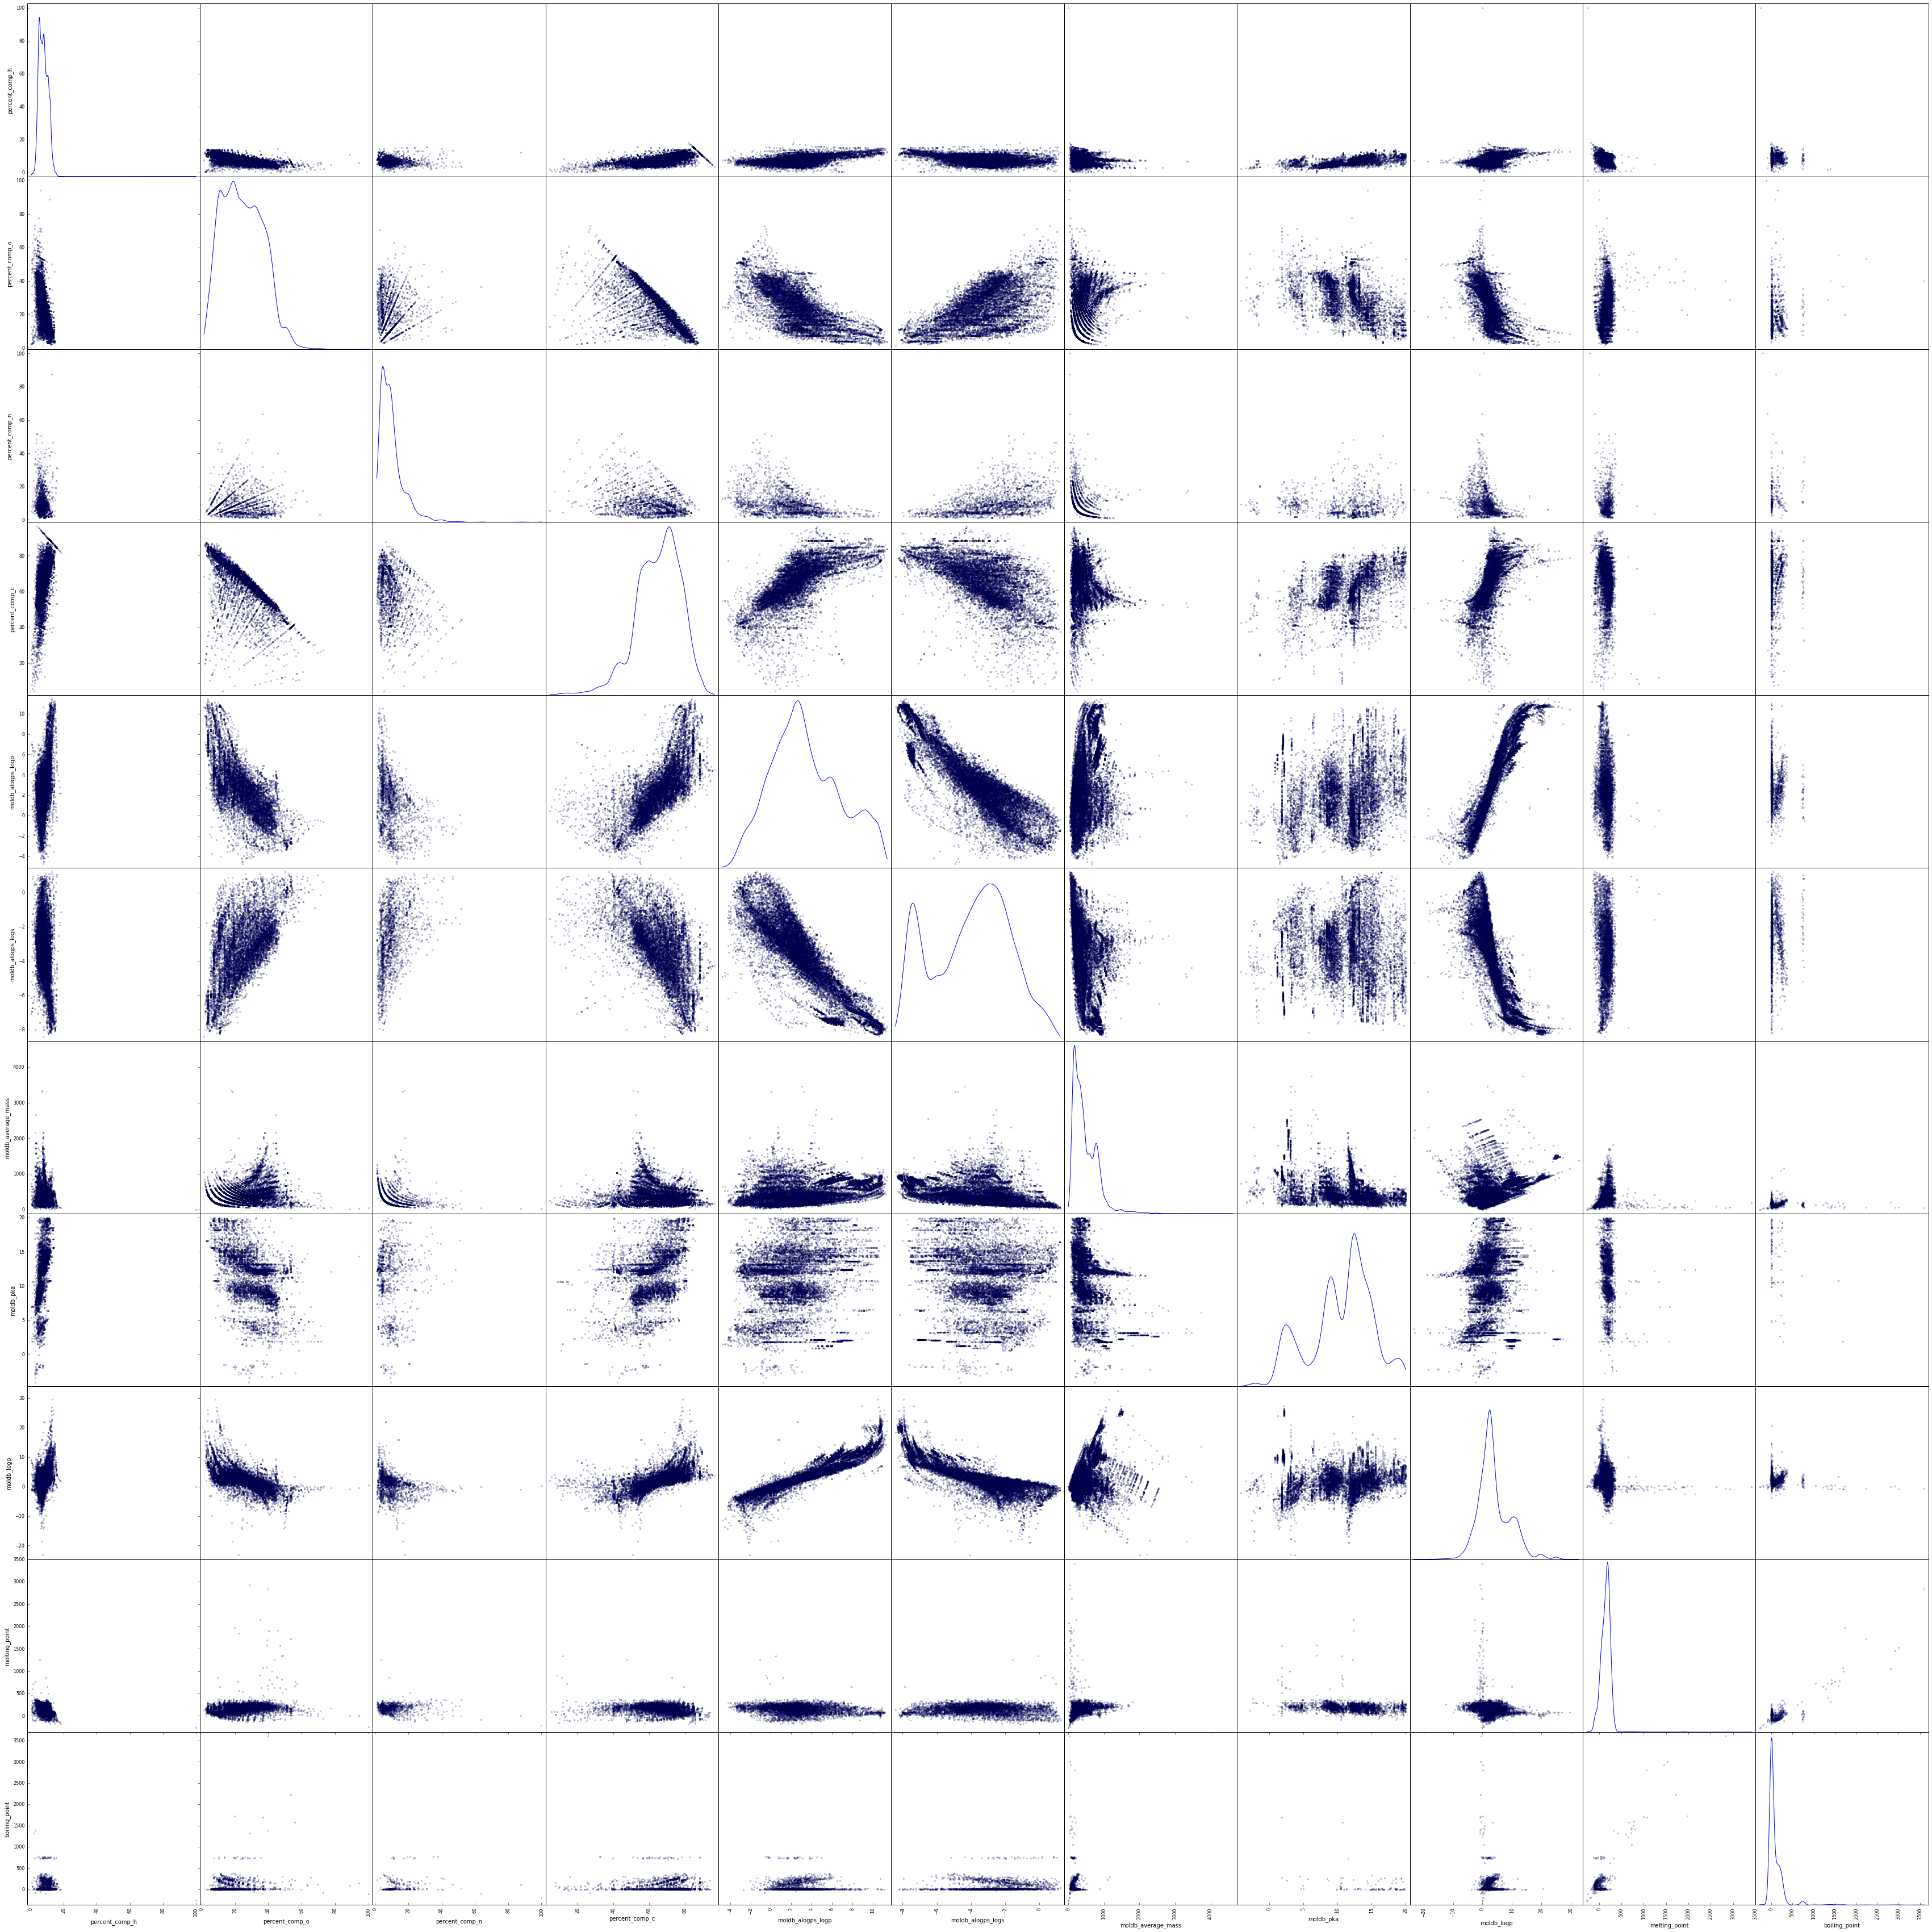

In [162]:
out = scatter_matrix(compounds[composition_columns + numeric_columns], alpha=0.2, figsize=(60, 60), diagonal='kde')

In [161]:
compounds[composition_columns + numeric_columns].corr()

percent_comp_h  percent_comp_o  percent_comp_n  \
percent_comp_h            1.000000       -0.651244       -0.011785   
percent_comp_o           -0.651244        1.000000       -0.015024   
percent_comp_n           -0.011785       -0.015024        1.000000   
percent_comp_c            0.612712       -0.772706       -0.296828   
moldb_alogps_logp         0.522126       -0.702669       -0.347250   
moldb_alogps_logs        -0.362252        0.567187        0.412425   
moldb_average_mass       -0.153588        0.281715       -0.281447   
moldb_pka                 0.605739       -0.491190       -0.029785   
moldb_logp                0.428218       -0.645608       -0.279337   
melting_point            -0.395463        0.208559       -0.064728   
boiling_point            -0.058335        0.133599        0.043271   

                    percent_comp_c  moldb_alogps_logp  moldb_alogps_logs  \
percent_comp_h            0.612712           0.522126          -0.362252   
percent_comp_o           -0.772706          -0.702669           0.567187   
percent_comp_n           -0.296828          -0.347250           0.412425   
percent_comp_c            1.000000           0.712105          -0.597530   
moldb_alogps_logp         0.712105           1.000000          -0.888051   
moldb_alogps_logs        -0.597530          -0.888051           1.000000   
moldb_average_mass       -0.147984           0.334252          -0.500515   
moldb_pka                 0.436696           0.153191          -0.046274   
moldb_logp                0.651117           0.942138          -0.853213   
melting_point            -0.182628          -0.188038          -0.049677   
boiling_point            -0.004490          -0.052155           0.061102   

                    moldb_average_mass  moldb_pka  moldb_logp  melting_point  \
percent_comp_h               -0.153588   0.605739    0.428218      -0.395463   
percent_comp_o                0.281715  -0.491190   -0.645608       0.208559   
percent_comp_n               -0.281447  -0.029785   -0.279337      -0.064728   
percent_comp_c               -0.147984   0.436696    0.651117      -0.182628   
moldb_alogps_logp             0.334252   0.153191    0.942138      -0.188038   
moldb_alogps_logs            -0.500515  -0.046274   -0.853213      -0.049677   
moldb_average_mass            1.000000  -0.383395    0.311626       0.165920   
moldb_pka                    -0.383395   1.000000    0.041534      -0.202921   
moldb_logp                    0.311626   0.041534    1.000000      -0.167006   
melting_point                 0.165920  -0.202921   -0.167006       1.000000   
boiling_point                -0.083747  -0.358277   -0.133160       0.808975   

                    boiling_point  
percent_comp_h          -0.058335  
percent_comp_o           0.133599  
percent_comp_n           0.043271  
percent_comp_c          -0.004490  
moldb_alogps_logp       -0.052155  
moldb_alogps_logs        0.061102  
moldb_average_mass      -0.083747  
moldb_pka               -0.358277  
moldb_logp              -0.133160  
melting_point            0.808975  
boiling_point            1.000000

In [87]:
weight_vs_boiling_point = pd.read_sql("SELECT boiling_point, moldb_average_mass FROM compounds " + 
                                      "WHERE boiling_point IS NOT NULL AND moldb_average_mass IS NOT NULL", connection)

In [89]:
weight_vs_boiling_point['boiling_point'] = weight_vs_boiling_point['boiling_point'].str.extract("([0-9]+\.?[0-9]?[0-9]?)°", expand = True).astype('float')

In [90]:
weight_vs_boiling_point['moldb_average_mass'] = weight_vs_boiling_point['moldb_average_mass'].astype('float') 

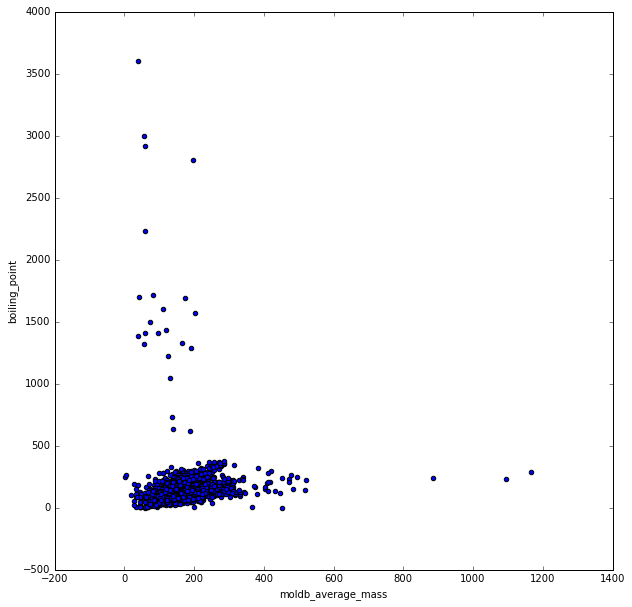

In [91]:
out = weight_vs_boiling_point.plot(kind = 'scatter', x ='moldb_average_mass', y = 'boiling_point',
                            figsize = (10,10))

In [92]:
weight_vs_boiling_point.corr()

boiling_point  moldb_average_mass
boiling_point            1.000000            0.053522
moldb_average_mass       0.053522            1.000000

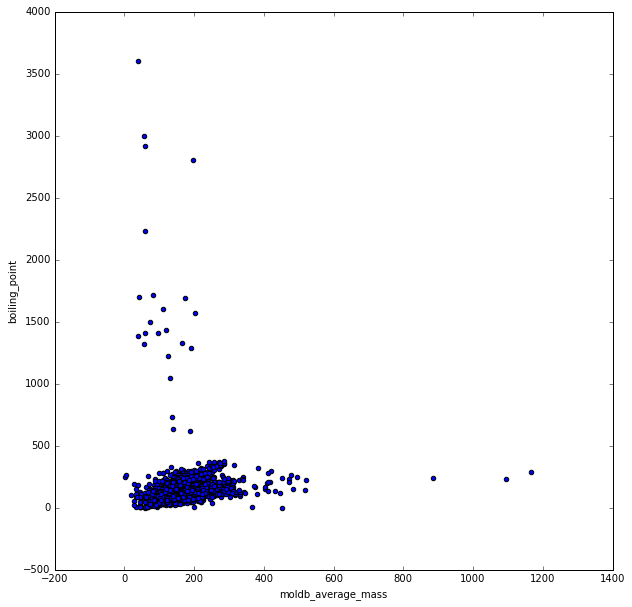

In [93]:
weight_vs_boiling_point[weight_vs_boiling_point.boiling_point != 0].plot(kind = 'scatter', x ='moldb_average_mass', y = 'boiling_point',
                            figsize = (10,10))

In [95]:
weight_vs_boiling_point[weight_vs_boiling_point.boiling_point != 0].corr()

boiling_point  moldb_average_mass
boiling_point            1.000000            0.053522
moldb_average_mass       0.053522            1.000000

Remove outliers

In [97]:
A = weight_vs_boiling_point[~((weight_vs_boiling_point-weight_vs_boiling_point.mean()).abs()>3*weight_vs_boiling_point.std())]

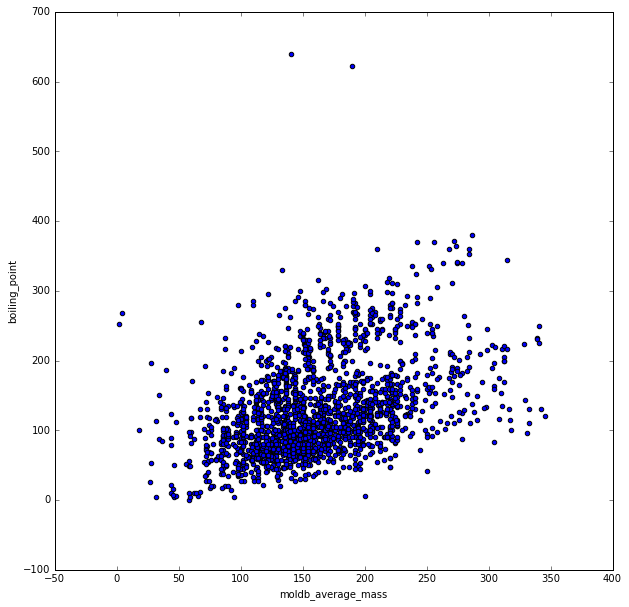

In [98]:
A[A.boiling_point != 0].plot(kind = 'scatter', x ='moldb_average_mass', y = 'boiling_point',
                            figsize = (10,10))

In [99]:
A.corr()

boiling_point  moldb_average_mass
boiling_point            1.000000            0.411855
moldb_average_mass       0.411855            1.000000

In [100]:
columns = composition_columns + numeric_columns

In [106]:
compounds[numeric_columns].dropna()

moldb_alogps_logp  moldb_alogps_logs  moldb_average_mass  moldb_pka  \
209                -2.03               0.98            122.1198  14.290000   
591                -1.93               1.10             92.0938  15.170000   
598                 0.93              -0.19            100.1158  16.168589   
717                 1.96              -1.09            138.1207  13.230000   
796                 1.93              -1.24            133.1473  15.090000   
1200                2.73              -2.49            156.1839  19.320000   
1311               -0.25              -0.37            132.1146   4.560000   
1730               -0.53               0.25            118.0880   5.690000   
1781               -2.68               0.10            182.1718  13.380000   
2586                2.49              -3.05            258.2262   8.507964   
3095               -0.14               0.08            116.1152  19.610000   
3097               -1.02               0.90             76.0514  14.780000   
3131                8.18              -6.25            328.5729  16.843943   
3139                1.00              -1.48            174.1944   4.900000   
6463               -0.66               0.73             88.1051  17.819754   
6468                0.04               0.10            116.1583  18.683656   
6641                1.13              -2.12            108.2260  10.513206   
6673                0.13              -0.66            146.1412   4.700000   
6733                0.84              -1.63             94.1990  10.583851   
6736                4.26              -4.29            192.3850  10.501854   
7101                0.70              -0.13            110.1106  10.730000   
7115                4.00              -3.21            236.3499  15.231099   
7138                3.10              -3.37            212.2472  16.350000   
7219                3.81              -3.42            228.2863  10.387640   
8067                3.24              -4.26            210.2711  16.583781   
8073                3.77              -2.63            194.2701  10.910621   
8074                1.57              -1.48            136.1479  16.463239   
8077                1.62              -1.43            136.1479  16.710000   
8101                2.02              -2.53            194.2271  19.591525   
8103                1.91              -1.78            150.1745  16.478357   
...                  ...                ...                 ...        ...   
8570               -0.59               0.83             90.1210  15.680000   
9188                0.54              -0.18            142.1525  16.570000   
9233               -0.57              -0.14            206.1932  12.612087   
9373               -0.20              -1.69            200.1025   2.637412   
9608               -1.02               0.96             74.0785  17.940000   
9622                1.62              -1.74            166.1739  16.560000   
9759                1.37              -1.92            188.2209   4.980000   
9978                3.80              -4.56            305.4119  15.950000   
10011               3.77              -4.75            402.4792  18.571785   
10123               0.91              -1.33            166.1739  19.601287   
10154               1.17              -1.41            276.2830  18.689538   
10207               6.14              -5.07            298.4608  18.401256   
10619               1.23              -3.58           1094.2416  12.360000   
11848               1.85              -1.32            172.2646  19.290000   
12068               1.85              -1.32            172.2646  19.294744   
12225               0.82               0.40            109.1259  18.125020   
12466               0.17              -1.41            197.2310  14.050000   
13055               1.51              -2.01            180.2005  15.620000   
13169               2.76              -3.09            236.3499  18.520699   
13560               1.09     

### Analyzing foods and nutrients

First we select those rows which are describing nutrients. We can select them by checking the *source_type* of the row.

In [9]:
nutrients = contents[contents.source_type == "Nutrient"]

Now we want to see the most common nutrients. We can find them by grouping the rows by the nutrients and counting the different foods they appear in. So we group the rows by the attribute *source_id* and count for each *source_id* the different (unique) *orig_food_id*s. 

In [10]:
gb_sourceid = nutrients.groupby(contents.source_id).orig_food_id.nunique()

We want to see how this grouping looks like, so we just call the plot function for the result.

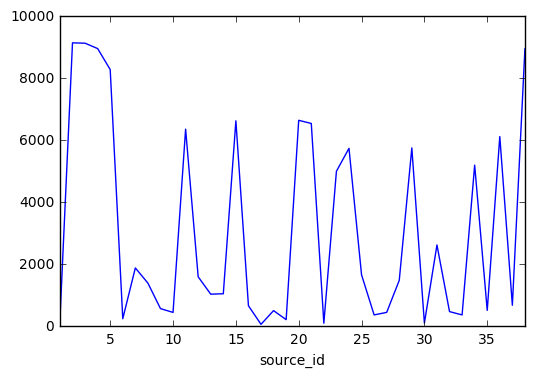

In [11]:
gb_sourceid.plot()

As we see, we have in our dataset about 40 differents nutreints and some of them are present in more than 8000 foods.

Now we want to get the name of the nutrient which is present in the most foods. For this we first get the id of the nutrient, then we select the first row the nutrient is present in, and we get the name of the nutrient from this row.

In [12]:
sourceid_maxfood = gb_sourceid.idxmax()
contents[contents.source_id == sourceid_maxfood].head(1).orig_source_name.values[0]

'Protein, total'

As we see, the protein is the most common nutrient.

#### Group by foods

We are also want to find the most nutrious foods. In other words, the food which contains the most kinds of nutrients.
For this we group by the rows by the ids of the foods, *orig_food_id*, and we count the ids of the different nutreins in each food, *source_id*.

In [19]:
gb_foodid = nutrients.groupby(contents.orig_food_id).source_id.nunique()

We plot the result to see the new data.

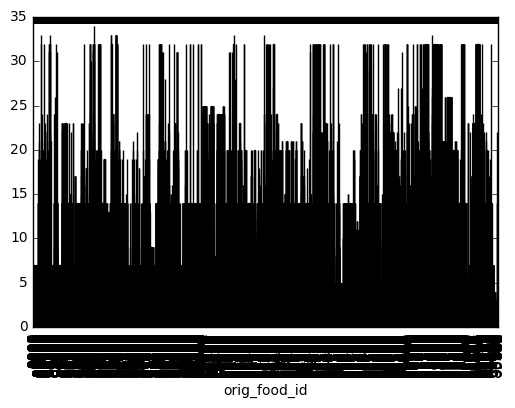

In [18]:
gb_foodid.plot(kind='bar')

As we see, a lot of foods contain more than 30 different nutrients.

Next, we select the food with the most different nutrients using the *idxmax* function.
After we have got the id of the most nutrious food, we select the first row in which this food appears, and we get its common name.

In [20]:
foodid_maxsource = gb_foodid.idxmax()
contents[contents.orig_food_id == foodid_maxsource].head(1).orig_food_common_name.values[0]

'Margarine-like, vegetable oil spread, approximately 37% fat, unspecified oils, with salt, with added vitamin D'

According to this dataset, the most nutrious food is the margarine-like vegetable oil. We presume that it is fortified, this is why it has so many nutrients.